<h1>Método Principal</h1>

In [1]:
#função de busca linear
function linear_search(f::Function,x::Vector,d::Vector,method::Function)
    ϕ = t->f(x+t*d)
    α = method(f,x,d)
    return (ϕ(α),x+α*d)
end

linear_search (generic function with 1 method)

<h1>Funções Auxiliares</h1>

In [2]:
import ForwardDiff  # calcula derivadas usando automatic differentiation in forward mode
using LinearAlgebra #adiciona operações de algebra linear
using Plots

pyplot()#usa pyplot como backend engine
∇ = (h,x)->ForwardDiff.gradient(h,x) #gradiente de h(x)
Hessian = (h,x)->ForwardDiff.hessian(h,x) # hessian de h(x)
Df = (h,x)->ForwardDiff.derivative(h,x);  # primeira derivada de h'(x)
D_2f = (h,x)->ForwardDiff.derivative(z->ForwardDiff.derivative(h,z),x) # segunda derivada h"(x)

#11 (generic function with 1 method)

<h1>Método da Seção Áurea</h1>
          

In [3]:
function secao_aurea(f::Function,x::Vector,d::Vector;φ::Function = t->f(x+t*d),ρ = 1/2,ϵ = 1e-9)::Float64
    θ_1 = (3 - sqrt(5))/2.0
    θ_2 = (sqrt(5) - 1)/2.0
    #Obtenção intervalo
    a=0
    b=2*ρ
    s = b / 2
    while(φ(b)<φ(s))
        a = s
        s = b
        b *= 2
    end
    #Obtenção de t
    u = a + θ_1*(b - a)
    v = a + θ_2*(b - a)
    iter=0
    while(b - a > ϵ)
        if(φ(u)<φ(v))
            b = v
            v = u
            u = a + θ_1*(b - a)
        else
            a = u
            u = v
            v = a + θ_2*(b - a)
        end
    end
    return (u+v)/2
end

function secao_aurea(f::Function,x::Vector,d::Vector,(a,b)::Tuple{Float64,Float64};φ::Function = t->f(x+t*d),ρ = 1/2,ϵ = 1e-9)::Float64
    θ_1 = (3 - sqrt(5))/2.0
    θ_2 = (sqrt(5) - 1)/2.0
    #Obtenção de t
    u = a + θ_1*(b - a)
    v = a + θ_2*(b - a)
    while(b - a > ϵ)
        if(φ(u)< φ(v))
            b = v
            v = u
            u = a + θ_1*(b - a)
        else
            a = u
            u = v
            v = a + θ_2*(b - a)
        end
    end
    return (u+v)/2
end
    

secao_aurea (generic function with 2 methods)

In [4]:
#exemplo 4.5 livro
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],secao_aurea)

(0.36363636363636365, [2.363636358633485, 0.45454545287782844])

<h1>Método de Newton</h1>

In [5]:
function newton(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64=0.25,ϵ = 1e-9,n_iter=10000)::Float64
   iter = 0
   while (abs(Df(φ,t)) > ϵ && iter < n_iter)
         t = t - (Df(φ,t)/D_2f(φ,t))
         iter = iter + 1
   end 
   return t;
end

newton (generic function with 1 method)

In [6]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],newton)

(0.36363636363636365, [2.3636363636363638, 0.4545454545454546])

<h1> Método de Armijo </h1>

In [7]:
function armijo(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64= 1.0,η::Float64 = 0.25)
    # f(x + td) > f(x) +t(∇f(x)⋅ d)
    while (φ(t)>φ(0)+ η*t*(∇(f,x)⋅d))
      t *=0.8
    end
    return t
end

armijo (generic function with 1 method)

In [8]:
#exemplo 4.10 livro
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],armijo)

(0.5528000000000003, [2.9200000000000004, 0.6400000000000001])

<h1>Testes</h1>

<h3>primeiro dados de teste</h3>

In [9]:
f1 = x-> (x[1]-2)^4 + (x[1] - 2*x[2])^2
x0 = [0,3]
d0 = -∇(f1,x0)

2-element Array{Int64,1}:
  44
 -24

Método de busca exata seção áurea

In [10]:
linear_search(f1,x0,d0,secao_aurea)

(0.3653851152608548, [2.707533345633471, 1.5231636296544704])

Método de Newton

In [11]:
linear_search(f1,x0,d0,newton)

(0.3653851152608548, [2.7075333493476896, 1.523163627628533])

Método de armijo

In [12]:
linear_search(f1,x0,d0,armijo)

(1.2018466871483393, [3.023656976384002, 1.350732558335999])

<h3>segundo dados de teste</h3>

In [13]:
f2 = x-> 100*(x[2]-(x[1])^2)^2 + (1 - x[1])^2
x0 = [-1.9,2]
d0 = -∇(f2,x0)

2-element Array{Float64,1}:
 1229.3999999999999
  322.0

Método de busca exata seção áurea

In [14]:
linear_search(f2,x0,d0,secao_aurea)

(0.5132451974405922, [1.7160553132339524, 2.9471041246635212])

Método de Newton

In [15]:
linear_search(f2,x0,d0,newton)

(0.5132451974225749, [1.7160551793785697, 2.9471040896046032])

Método de armijo

In [16]:
linear_search(f2,x0,d0,armijo)

(33.64676218894833, [-1.2766201408317648, 2.1632733973093963])

<h3>terceiro dados de teste</h3>

In [17]:
f3 = x-> 1.5 - x[1]*(1-x[2])^2 + (2.25 - x[1]*(1-(x[2])^2))^2 +(2.625 - x[1]*(1-x[2]^3))^2
x0 = [0,0]
d0 = -∇(f3,x0)

2-element Array{Float64,1}:
 10.75
 -0.0

Método de busca exata seção áurea

In [18]:
linear_search(f3,x0,d0,secao_aurea)

(-0.9921875, [2.687500003177064, 0.0])

Método de Newton

In [19]:
linear_search(f3,x0,d0,newton)

(-0.9921875, [2.6875, 0.0])

Método de armijo

In [20]:
linear_search(f3,x0,d0,armijo)

(0.40246290720000555, [3.5225600000000017, 0.0])

<h3>quarto dados de teste</h3>

In [21]:
f4 = x-> (x[1] - 2*x[2]+5*x[2]^2 - x[2]^3 -13)^2 + (x[1] - 14*x[2] + x[2]^2 + x[2]^3 -29)^2
x0 = [15,-2]
d0 = -∇(f4,x0)

2-element Array{Int64,1}:
  -88
 2432

Método de busca exata seção áurea

In [22]:
linear_search(f4,x0,d0,secao_aurea)

(54.449342510155596, [14.952295930264228, -0.6816329818477422])

Método de Newton

In [23]:
print(linear_search(f4,x0,d0,newton))
print("\n")
print(linear_search(f4,x0,d0,(f,x,d)->newton(f,x,d,t = 0.0001)))

(136.12522866780478, [14.789735317977993, 3.8109512122445723])
(54.44934251014155, [14.952295937106829, -0.6816331709523435])

Método de armijo

In [24]:
linear_search(f4,x0,d0,armijo)

(72.65870189464304, [14.944223373589958, -0.45853687012247035])

<h3>quinto dados de teste</h3>

In [25]:
f5 = x-> 100*(x[3] - ((x[1]+x[2])/2)^2)^2 + (1-x[1])^2 + (1-x[2])^2
x0 = [-1.2,2,0]
d0 = -∇(f5,x0)

3-element Array{Float64,1}:
  -8.400000000000002
 -14.800000000000002
  32.00000000000001

Método de busca exata seção áurea

In [26]:
linear_search(f5,x0,d0,secao_aurea)

(34.579084112692456, [-3.7391888342040716, -2.473808898359554, 9.673100320777413])

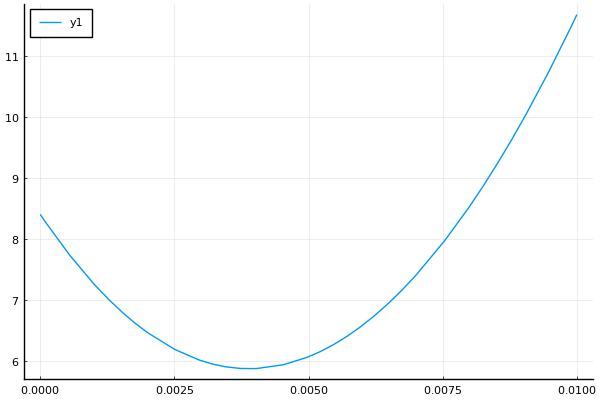

In [29]:
plot(t->f5(x0+t*d0),0,0.01)

In [30]:
linear_search(f5,x0,d0,(f,x,d)->secao_aurea(f,x,d,(0.0,1e-2)))

(5.8732180672986045, [-1.2327306570882732, 1.9423316994158994, 0.12468821747913622])

Método de Newton

In [27]:
linear_search(f5,x0,d0,newton)

(34.579084112692456, [-3.7391888351214044, -2.4738088999758068, 9.673100324272015])

Método de armijo

In [28]:
linear_search(f5,x0,d0,armijo)

(5.983221692235954, [-1.239667878456105, 1.930108976053529, 0.15111572745182889])